In [2]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
# from tensorflow.keras import layers
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

In [3]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [4]:
fashion_train.shape

(60000, 785)

In [32]:
X_train_fashion=fashion_train.drop('label',axis=1)
y_train_fashion=fashion_train['label']
X_test_fashion=fashion_test.drop('label',axis=1)
y_test_fashion=fashion_test['label']

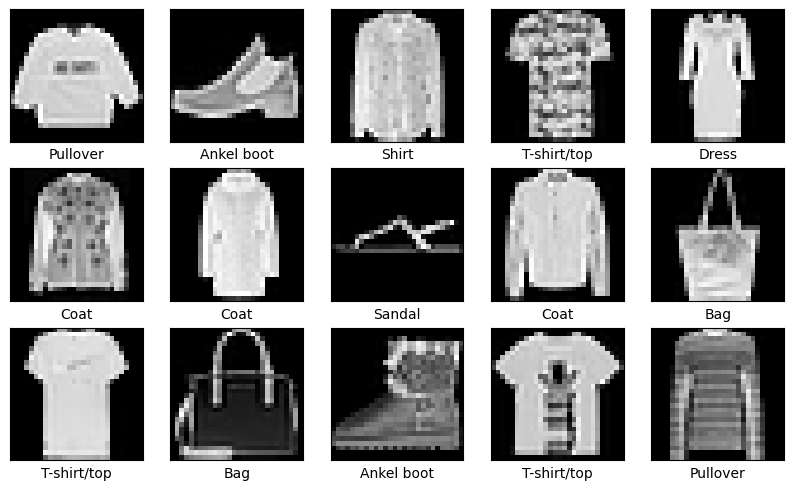

In [33]:
#Reshaping the image for to see
x_train_reshape=X_train_fashion.values.reshape(-1,28,28)
x_test_reshape=X_test_fashion.values.reshape(-1,28,28)
#Name of number digits in order
col_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel boot']
#Visuvalising the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i],cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [34]:
print(f"Correct encoded shape: {y_train_fashion.shape}")

Correct encoded shape: (60000,)


In [35]:
#Encoding Digit mnist labels
y_train_fashion=to_categorical(y_train_fashion,num_classes=10)
y_test_fashion=to_categorical(y_test_fashion,num_classes=10)
#Creating base neural network
model=keras.Sequential([
    layers.Dense(128,activation='relu',input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax')  
])

#param_number=output_channel_number *(input_channel_number + 1)
model.summary()
# compiling the model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
history=model.fit(X_train_fashion,y_train_fashion,batch_size=100,epochs=30,validation_data=(X_test_fashion,y_test_fashion))

C:\Users\Windows\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 24)                  │           3,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,130 (410.66 KB)

 Trainable params: 104,778 (409.29 KB)

 Non-trainable params: 352 (1.38 KB)

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.6029 - loss: 1.1272 - val_accuracy: 0.8046 - val_loss: 0.5484
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.7425 - loss: 0.7434 - val_accuracy: 0.8110 - val_loss: 0.5005
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7724 - loss: 0.6690 - val_accuracy: 0.8433 - val_loss: 0.4586
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7840 - loss: 0.6309 - val_accuracy: 0.8421 - val_loss: 0.4466
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7982 - loss: 0.6050 - val_accuracy: 0.8631 - val_loss: 0.4197
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8044 - loss: 0.5875 - val_accuracy: 0.8420 - val_loss: 0.4503
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8062 - loss: 0.5771 - val_accuracy: 0.8608 - val_loss: 0.4104
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8108 - loss: 0.5645 - 

In [37]:
test_loss_fashion,test_acc_fashion=model.evaluate(X_test_fashion,y_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8718 - loss: 0.3747


In [38]:
print("Fashion  MNtest Test accuracy:",round(test_acc_fashion,4))

Fashion  MNtest Test accuracy: 0.8718


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


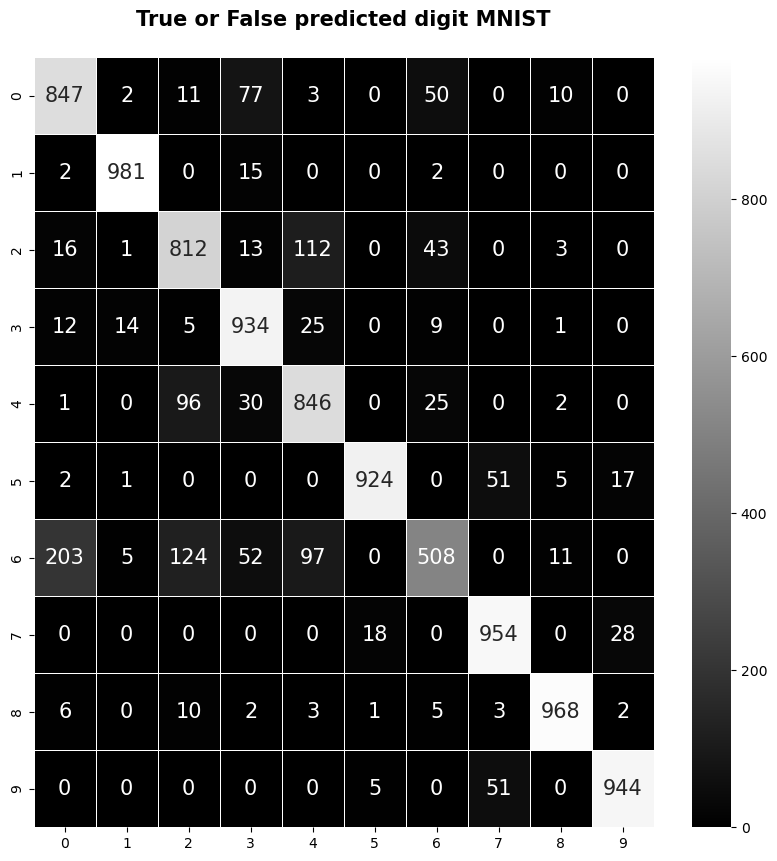

In [42]:
# Correct predictions on test set
y_predict_fash = model.predict(X_test_fashion)
y_predicts_fash = np.argmax(y_predict_test, axis=1)  # convert one-hot to class indices

# Then compare with actual test labels
y_test_fash_eval = np.argmax(y_test_fashion, axis=1)

# Confusion matrix
con_mat = confusion_matrix(y_test_fash_eval, y_predicts_fash)

# Plot
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title('True or False predicted digit MNIST\n', fontweight='bold', fontsize=15)
plt.show()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test_fash_eval,y_predicts_fash))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.98      0.98      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.83      0.93      0.88      1000
           4       0.78      0.85      0.81      1000
           5       0.97      0.92      0.95      1000
           6       0.79      0.51      0.62      1000
           7       0.90      0.95      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [44]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


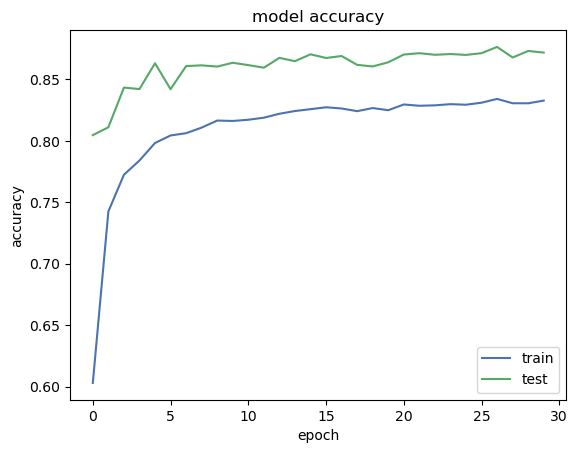

In [45]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

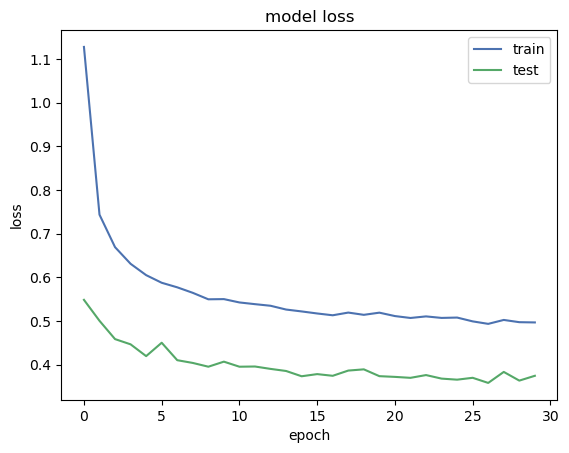

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


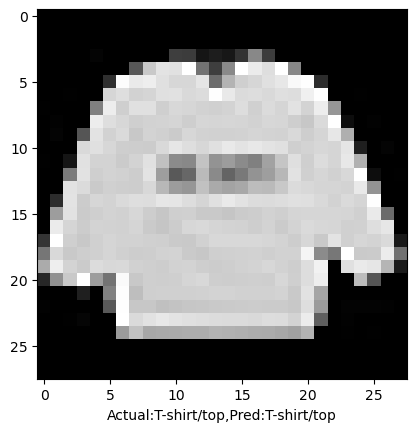

In [53]:
y_pridict_single=model.predict(X_test_fashion.loc[[0],:].values)
y_pridicts_single=np.argmax(y_pridict_single,axis=1)
y_test_fash_eval = np.argmax(y_test_fashion, axis=1)
col_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel boot']
#plt.figure(figsize=(10,10))
plt.imshow(x_train_reshape[0], cmap='gray')# Givieing the image number in X_test and reshape in 28*28 croess matries
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_pridicts_single[0]]))# Giving the actival and predicted value and after the {} will store in that
plt.show()